In [1]:
from aiida import orm, load_profile
from ase.io import read
from ase.build import make_supercell, cut, minimize_tilt, niggli_reduce, minimize_rotation_and_translation

import importlib, aiida_dislocation.tools.cut
importlib.reload(aiida_dislocation.tools.cut)
from aiida_dislocation.tools.cut import list_to_tex, plot_layers, get_transformed_cell, group_structure_layers

import numpy as np
from pymatgen.core import Lattice, Structure
import matplotlib.pyplot as plt

load_profile()

Profile<uuid='155a05c5c8f7420aa49bbf9207908698' name='supercon'>

# Visualize A1 structure

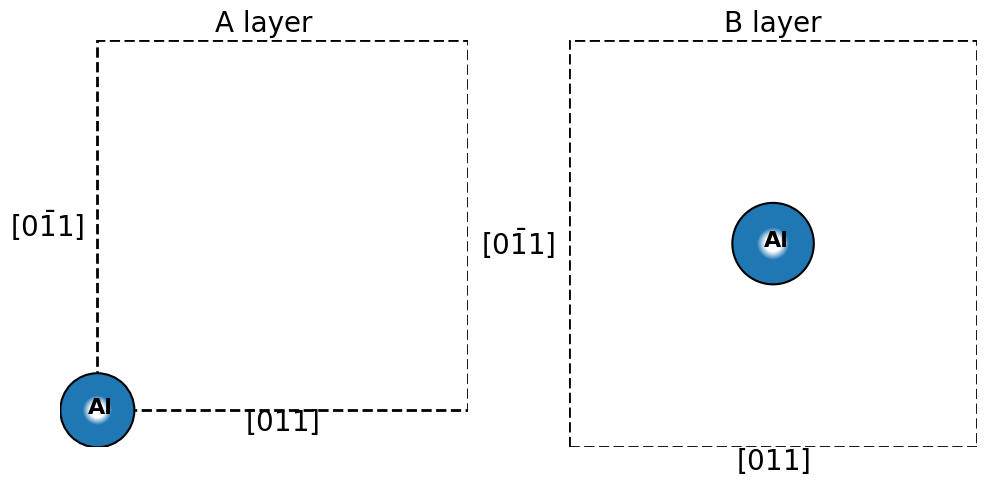

In [5]:
ase_atom = read('./structures/cif/Al-225-A1.cif', format='cif')


cell_matrix = ase_atom.cell.array
species      = ["Al", ]    # 举例
frac_coords  = [
    [0.0, 0.0, 0.0],
]

# Assuming such a lattice:
# [1, 1, 0]
# [1, 0, 1]
# [0, 1, 1]

# [1, 1, -1] --> [2, 0, 0]
# [1, -1, 1] --> [0, 2, 0]
# [-1, 1, 1]  --> [0, 0, 21]

# [1, 0, 0] -> [1, 1, 0]
# [0, 1, -1] -> [1, -1, 0]
# [-1, 1, 1] -> [0, 0, 2]

# [1, 1, 1] -> [2, 2, 2]
# [1, -1, 0] -> [0, 1, -1]
# [1, 0, -1] -> [1, 0, -1]

slipping_systems = {
    '100': {
        'cut_plane': [2, 0, 0],
        'a': [0, 1, 1],
        'b': [0, -1, 1],
        },
    '110': {
        'cut_plane': [1, 1, 0],
        'a': [1, -1, 0],
        'b': [0, 0, 2]
        },
    '111': {
        'cut_plane': [2, 2, 2],
        'a': [1, -1, 0],
        'b': [1, 0, -1],
        },
    }

old_lattice = Lattice(cell_matrix)
old_struct  = Structure(old_lattice, species, frac_coords)

tm = np.array([
    [1, 1, -1],
    [1, -1, 1],
    [-1, 1, 1],
])/2


slipping_system = slipping_systems['100']
struct = get_transformed_cell(old_struct, slipping_system, tm)
layers, masks, frac_coords = group_structure_layers(struct)

fig, axes = plt.subplots(1, len(layers), figsize=(10, 10*len(layers)))


plot_layers(struct, axes, slipping_system)
# ax.set_aspect('equal')

for ax in axes:
    ax.set_aspect('equal')


plt.tight_layout()
plt.show()

# Visualize A2 structure

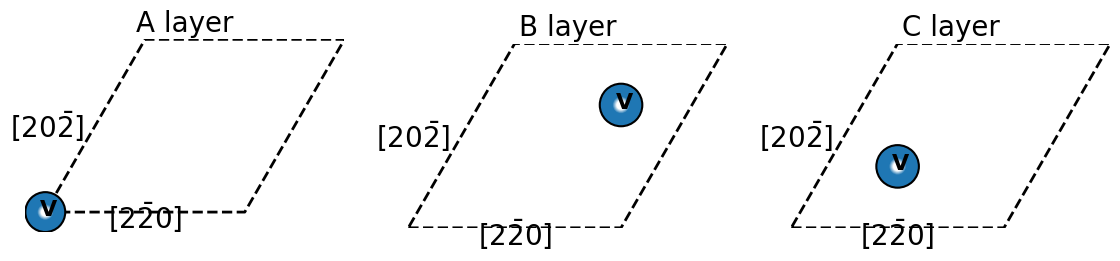

In [8]:
ase_atom = read('./structures/cif/V-227-A2.cif', format='cif')

A = ase_atom.cell.cellpar()[0]/2

slipping_systems = {
    '100': {
        'cut_plane': [2, 0, 0],
        'a': [0, 2, 0],
        'b': [0, 0, 2],
        },
    '110': {
        'cut_plane': [2, 2, 0],
        'a': [1, -1, 1],
        'b': [-1, 1, 1]
        },
    '111': {
        'cut_plane': [1, 1, 1],
        'a': [2, -2, 0],
        'b': [2, 0, -2],
        },
    }


unit_rep = np.array([
    [-1, 1, 1],
    [1, -1, 1],
    [1, 1, -1],
])

tm = np.array([
    [0,  1/2, 1/2],
    [1/2,0,   1/2],
    [1/2,1/2, 0  ]
    ])

cell_array = A / 2 * unit_rep
species      = ["V", ]    # 举例
frac_coords  = [
    [0.0, 0.0, 0.0],
]

# (A) build old structure


old_lattice = Lattice(cell_array)
old_struct  = Structure(old_lattice, species, frac_coords)


slipping_system = slipping_systems['111']
struct = get_transformed_cell(old_struct, slipping_system, tm)
layers, masks, frac_coords = group_structure_layers(struct)

fig, axes = plt.subplots(1, len(layers), figsize=(14, 14*len(layers)))


plot_layers(struct, axes, slipping_system)

plt.show()


# Visualize B1 structure

[0.  0.5]


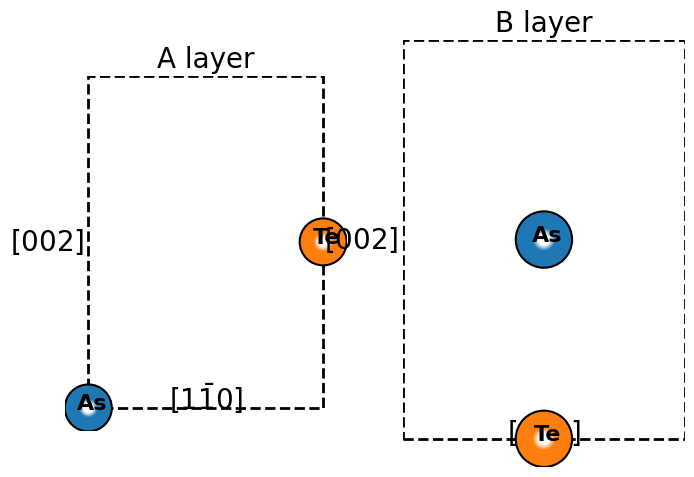

In [9]:
ase_atom = read('./structures/cif/mpds-S1605628-AsTe-225-B1.cif', format='cif')

slipping_systems = {
    '100': {
        'cut_plane': [2, 0, 0],
        'a': [0, 1, 1],
        'b': [0, 1, -1],
        },
    '110': {
        'cut_plane': [1, 1, 0],
        'a': [1, -1, 0],
        'b': [0, 0, 2]
        },
    '111': {
        'cut_plane': [2, 2, 2],
        'a': [1, -1, 0],
        'b': [1, 0, -1],
    }}

tm = np.array([
    [-1, 1, 1],
    [1, -1, 1],
    [1, 1, -1],
])/2

unit_rep = np.array([
    [0,  1, 1],
    [1,  0, 1],
    [1,  1, 0],
])

cell_matrix = ase_atom.cell.cellpar()[0] * unit_rep

species      = ["As", "Te"]    # 举例
frac_coords  = [
    [0.0, 0.0, 0.0],
    [0.5, 0.5, 0.5],
]


old_lattice = Lattice(cell_matrix)
old_struct  = Structure(old_lattice, species, frac_coords)



slipping_system = slipping_systems['110']
struct = get_transformed_cell(old_struct, slipping_system, tm)
layers, masks, frac_coords = group_structure_layers(struct)

print(layers)
fig, axes = plt.subplots(1, len(layers), figsize=(8, 8*len(layers)))


plot_layers(struct, axes, slipping_system)


# plt.tight_layout()
plt.show()

# Visualize C1b structure

NbCoSb
[[0.   0.   0.  ]
 [0.75 0.75 0.75]
 [0.5  0.5  0.5 ]]
Full Formula (Nb3 Co3 Sb3)
Reduced Formula: NbCoSb
abc   :  14.446839   5.897897   5.897897
angles:  60.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (9)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Nb    0         0         0
  1  Nb    0.333333  0.333333  0.333333
  2  Nb    0.666667  0.666667  0.666667
  3  Co    0.75      1         0
  4  Co    0.083333  0.333333  0.333333
  5  Co    0.416667  0.666667  0.666667
  6  Sb    0.5       0         1
  7  Sb    0.833333  0.333333  0.333333
  8  Sb    0.166667  0.666667  0.666667
[[5.89789727 0.        ]
 [2.94894864 5.10772887]]
[[0.00000000e+00 0.00000000e+00]
 [3.33333333e-01 3.33333333e-01]
 [6.66666667e-01 6.66666667e-01]
 [1.00000000e+00 1.20090933e-17]
 [3.33333333e-01 3.33333333e-01]
 [6.66666667e-01 6.66666667e-01]
 [1.15656227e-18 1.00000000e+00]
 [3.33333333e-01 3.33333333e-01]
 [6.66666667e-01 6.6

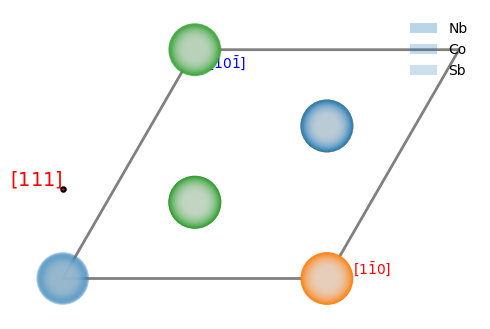

In [42]:
ase_atom = read('./structures/cif/mpds-S1612207-NbCoSb-216-C1b.cif', format='cif')
print(ase_atom.symbols)
print(ase_atom.get_scaled_positions())


slipping_systems = {
    '100': {
        'cut_plane': [1, 1, -1],
        'a': [1, -1, 0],
        'b': [0, 0, 1],
        },
    '110': {
        'cut_plane': [1, 0, 0],
        'a': [0, 1, -1],
        'b': [-1, 1, 1]
        },
    '111': {
        'cut_plane': [1, 1, 1],
        'a': [1, -1, 0],
        'b': [1, 0, -1],
        },
    }

unit_rep_inv = np.array([
    [-1, 1, 1],
    [1, -1, 1],
    [1, 1, -1],
])/2

unit_rep = np.array([
    [0,  1, 1],
    [1,  0, 1],
    [1,  1, 0],
])

cell_matrix = ase_atom.cell.cellpar()[0] * unit_rep

species      = ["Nb", "Co", "Sb"]    # 举例
frac_coords  = [
    [0.0, 0.0, 0.0],
    [0.75, 0.75, 0.75],
    [0.5, 0.5, 0.5],
]


old_lattice = Lattice(cell_matrix)
old_struct  = Structure(old_lattice, species, frac_coords)

# for normal_direction, slipping_system in slipping_systems.items():
# print(normal_direction)
slipping_system = slipping_systems['111']
M = numpy.array(
    [
        slipping_system['cut_plane'],
        slipping_system['a'],
        slipping_system['b']
    ], 
    dtype=int
    )
dst = SupercellTransformation(M)
struct = dst.apply_transformation(old_struct)
print(struct)

fig, ax = plt.subplots(figsize=(6,6))

plot_all_layers_element_colored(struct, fig, ax, slipping_system['a'], slipping_system['b'])

# 2) 只标一个点
ax.scatter(0, 2,
           s=10,               # 点大小
           c='red',             # 颜色
           marker='o',          # 圆点
           edgecolors='k',      # 黑色边缘
           linewidth=1.5,
           zorder=10)

# 3) 可选：加个文本标签
ax.text(0, 2, list_to_tex(slipping_system['cut_plane']),
        color='red',
        fontsize=14,
        va='bottom', ha='right')

# plt.tight_layout()
plt.show()

# Visualize E21 structure

Full Formula (Ta3 Ru9 C3)
Reduced Formula: TaRu3C
abc   :   6.935970   5.663196   5.663196
angles:  60.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (15)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Ta    0         0         0
  1  Ta    0.333333  0.333333  0.333333
  2  Ta    0.666667  0.666667  0.666667
  3  Ru    0.333333  0.833333  0.333333
  4  Ru    0.666667  0.166667  0.666667
  5  Ru    0         0.5       1
  6  Ru    0.333333  0.333333  0.833333
  7  Ru    0.666667  0.666667  0.166667
  8  Ru    0         1         0.5
  9  Ru    0.333333  0.833333  0.833333
 10  Ru    0.666667  0.166667  0.166667
 11  Ru    0         0.5       0.5
 12  C     0.5       1         1
 13  C     0.833333  0.333333  0.333333
 14  C     0.166667  0.666667  0.666667
[[5.66319572 0.        ]
 [2.83159786 4.90447136]]
[[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [0.83333333 0.33333333]
 [0.16666667 0.6

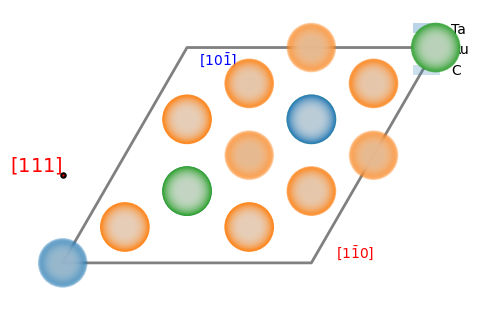

In [45]:
ase_atom = read('./structures/cif/icsd-77392-TaRu3C-221-E21.cif', format='cif')

slipping_systems = {
    '100': {
        'cut_plane': [1, 0, 0],
        'a': [0, 1, 0],
        'b': [0, 0, 1],
        },
    '110': {
        'cut_plane': [1, 1, 0],
        'a': [1, -1, 0],
        'b': [0, 0, 1]
        },
    '111': {
        'cut_plane': [1, 1, 1],
        'a': [1, -1, 0],
        'b': [1, 0, -1],
        },
    }

unit_rep_inv = np.array([
    [-1, 1, 1],
    [1, -1, 1],
    [1, 1, -1],
])/2

unit_rep = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
])

cell_matrix = ase_atom.cell.cellpar()[0] * unit_rep

species      = ["Ta", "Ru", "Ru", "Ru", "C"]    # 举例
frac_coords  = [
    [0.0, 0.0, 0.0],
    [0.5, 0.5, 0.0],
    [0.5, 0.0, 0.5],
    [0.0, 0.5, 0.5],
    [0.5, 0.5, 0.5],
]


old_lattice = Lattice(cell_matrix)
old_struct  = Structure(old_lattice, species, frac_coords)

# for normal_direction, slipping_system in slipping_systems.items():
# print(normal_direction)
slipping_system = slipping_systems['111']
M = numpy.array(
    [
        slipping_system['cut_plane'],
        slipping_system['a'],
        slipping_system['b']
    ], 
    dtype=int
    )
dst = SupercellTransformation(M)
struct = dst.apply_transformation(old_struct)
print(struct)

fig, ax = plt.subplots(figsize=(6,6))

plot_all_layers_element_colored(struct, fig, ax, slipping_system['a'], slipping_system['b'])

# 2) 只标一个点
ax.scatter(0, 2,
           s=10,               # 点大小
           c='red',             # 颜色
           marker='o',          # 圆点
           edgecolors='k',      # 黑色边缘
           linewidth=1.5,
           zorder=10)

# 3) 可选：加个文本标签
ax.text(0, 2, list_to_tex(slipping_system['cut_plane']),
        color='red',
        fontsize=14,
        va='bottom', ha='right')

# plt.tight_layout()
plt.show()